In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import datetime
from sklearn.metrics import mean_squared_error
import matplotlib.mlab as mlab
import math
from scipy.stats import norm
import statsmodels.graphics.tsaplots as tsa
from statsmodels.tsa.ar_model import AR
from random import random

In [13]:
df = pd.read_csv("Openhealth_S-Grippal.csv", delimiter=";", encoding="latin-1", decimal=",", na_values=0)

In [14]:
df.head()

,PERIODE,IAS_brut,IAS_lissé,Incidence_Sentinelles
0,2009-07-01,1.7,2.2,2.3
1,2009-07-02,3.4,2.1,2.3
2,2009-07-03,2.1,2.1,2.3
3,2009-07-04,1.3,2.0,2.3
4,2009-07-05,14.2,2.0,2.3


In [15]:
df = df.drop(['IAS_lissé', 'Incidence_Sentinelles'], axis=1)

In [16]:
df['IAS_brut'].isnull().sum()

9

In [17]:
df['IAS_brut'] = df['IAS_brut'].interpolate()

In [18]:
df['PERIODE'] = pd.to_datetime(df['PERIODE'])

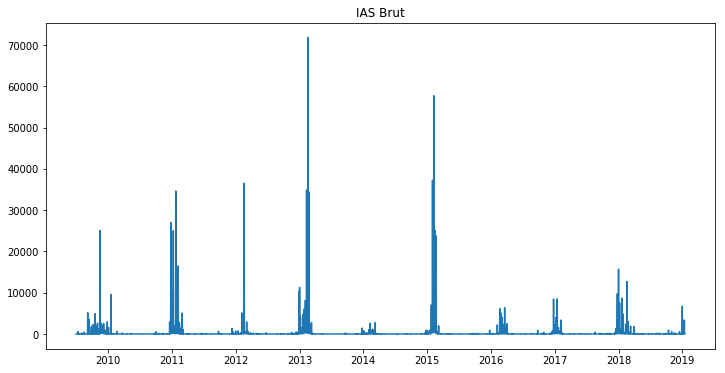

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df['PERIODE'].values, df['IAS_brut'].values)
plt.title("IAS Brut")
plt.show()

In [21]:
X = df.copy()
X_train = X[X['PERIODE'] < "2013-03-31"]
X_test = X[X['PERIODE'] >= "2013-03-31"]

## AR(p) Model

In [31]:
X_test

,PERIODE,IAS_brut
1369,2013-03-31,63.1
1370,2013-04-01,78.1
1371,2013-04-02,3.8
1372,2013-04-03,4.3
1373,2013-04-04,4.9
1374,2013-04-05,4.5
1375,2013-04-06,3.4
1376,2013-04-07,5.6
1377,2013-04-08,9.2
1378,2013-04-09,5.5


In [30]:
# contrived dataset
# fit model
model = AR(X_train['IAS_brut'])
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(X_test.index)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

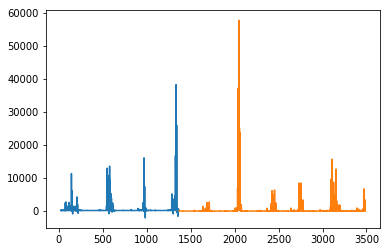

In [28]:
plt.plot(yhat)
plt.plot(X_test['IAS_brut'])